# Application of jupyter-matplotlib
# Overview
Taken from the matplotlib [readme](https://github.com/matplotlib/ipympl#ipympl)

Leveraging the Jupyter interactive widgets framework, `ipympl` enables the interactive features of matplotlib in the Jupyter notebook and in JupyterLab.

Besides, the figure canvas element is a proper Jupyter interactive widget which can be positioned in interactive widget layouts.

The standard-notebook has everything you need to get started with using jupyter-matplotlib

**Note: Some of the interactive displays shown below do not get saved well into the static `.ipynb` file, and thus won't show properly in a GitHub rendering or when you first open the `.ipynb` file.  Run these cells again to see the visuals.**

# Examples
Everything is from the matplotlib [examples](https://github.com/matplotlib/ipympl/blob/master/examples/ipympl.ipynb)  

In [1]:
# Enabling the `widget` backend.
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Testing matplotlib interactions with a simple plot
fig = plt.figure()
plt.plot(np.sin(np.linspace(0, 20, 100)))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
# Here are a few settings you can apply to the figure above
fig.canvas.toolbar_visible = False  # Hide the tool_bar at the side of the figure
fig.canvas.header_visible = False   # Hide the name at the top of the figure
fig.canvas.footer_visible = False   # Hide the footer
fig.canvas.resizable = False        # Prevent the widget from being resized
fig.canvas.capture_scroll = True    # If the mouse is over the canvas, scrolling
                                    # will not move the entire notebook

You can also call display on fig.canvas to display the interactive plot anywhere in the notebook. 

Both displays are linked (if you change a setting for the next fig.canvas the above display will also change

In [4]:
# If you want the header visible as it was set to `False` in line 3
fig.canvas.header_visible = True  
display(fig.canvas)

Canvas(capture_scroll=True, footer_visible=False, resizable=False, toolbar=Toolbar(toolitems=[('Home', 'Reset …

To embed the plot as a png in the notebook you can go with `display(fig)`

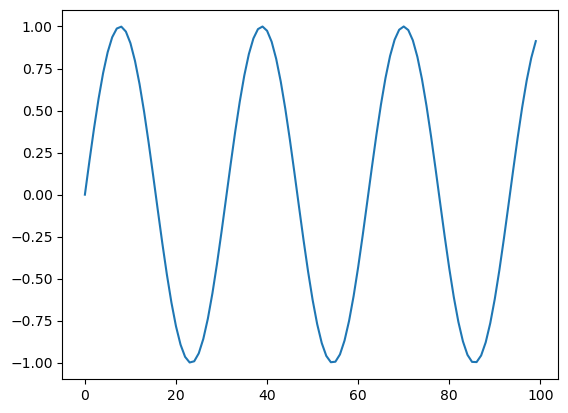

In [5]:
display(fig) #Display as a png 

# 3D Plotting

In [6]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Subplots

In [7]:
# A more complex example from the matplotlib gallery
np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Interactions with other widgets and layouting
When you want to embed the figure into a layout of other widgets you should call plt.ioff() before creating the figure otherwise code inside of plt.figure() will display the canvas automatically and outside of your layout.
## Without using ioff
Here we will end up with the figure being displayed twice. The button won't do anything it just placed as an example of layouting.

In [8]:
import ipywidgets as widgets

# ensure we are interactive mode 
# this is default but if this notebook is executed out of order it may have been turned off
plt.ion()


fig = plt.figure()
ax = fig.gca()
ax.imshow(Z)

widgets.AppLayout(
    center=fig.canvas,
    footer=widgets.Button(icon='check'),
    pane_heights=[0, 6, 1]
)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

AppLayout(children=(Button(icon='check', layout=Layout(grid_area='footer'), style=ButtonStyle()), Canvas(layou…

## Fixing the double display with ioff
If we make sure interactive mode is off when we create the figure then the figure will only display where we want it to.

In [9]:
plt.ioff()
fig = plt.figure()
plt.ion()

ax = fig.gca()
ax.imshow(Z)

widgets.AppLayout(
    center=fig.canvas,
    footer=widgets.Button(icon='check'),
    pane_heights=[0, 6, 1]
)

AppLayout(children=(Button(icon='check', layout=Layout(grid_area='footer'), style=ButtonStyle()), Canvas(layou…

# Interacting with other widgets
# Changing a line plot with a slide

In [10]:
# When using the `widget` backend from ipympl,
# fig.canvas is a proper Jupyter interactive widget, which can be embedded in
# an ipywidgets layout. See https://ipywidgets.readthedocs.io/en/stable/examples/Layout%20Templates.html

# One can bound figure attributes to other widget values.
from ipywidgets import AppLayout, FloatSlider

plt.ioff()

#Create the slider
slider = FloatSlider(
    orientation='horizontal',
    description='Factor:',
    value=1.0,
    min=0.02,
    max=2.0
)

slider.layout.margin = '0px 30% 0px 30%'
slider.layout.width = '40%'

fig = plt.figure()
fig.canvas.header_visible = False
fig.canvas.layout.min_height = '400px'
plt.title('Plotting: y=sin({} * x)'.format(slider.value))

x = np.linspace(0, 20, 500)

lines = plt.plot(x, np.sin(slider.value * x))

def update_lines(change):
    plt.title('Plotting: y=sin({} * x)'.format(change.new))
    lines[0].set_data(x, np.sin(change.new * x))
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)

AppLayout(children=(FloatSlider(value=1.0, description='Factor:', layout=Layout(grid_area='footer', margin='0p…